Faire une API fonctionnelle

In [1]:
import tensorflow as tf
import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
housing = fetch_california_housing()
X_train,X_test,y_train,y_test = train_test_split(housing.data,housing.target,test_size=0.2,random_state=42)

In [7]:
layer_norm = keras.layers.Normalization(input_shape=X_train.shape[1:])
layer_hidden1 = keras.layers.Dense(50,activation="relu")
layer_hidden2 = keras.layers.Dense(50,activation="relu")
layer_concat = keras.layers.Concatenate()
layer_output = keras.layers.Dense(1)

In [8]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
norm = layer_norm(input_)
hidden1 = layer_hidden1(norm)
hidden2 = layer_hidden2(hidden1)
concat = layer_concat([norm,hidden2])
output = layer_output(concat)

model = keras.Model(inputs = [input_],outputs=[output])

In [9]:
optimizer = keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer,
              loss='mse',
              metrics=['RootMeanSquaredError'])
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
413/413 [==============================] - 1s 2ms/step - loss: 601.2423 - root_mean_squared_error: 24.5202 - val_loss: 6.0936 - val_root_mean_squared_error: 2.4685
Epoch 2/30
413/413 [==============================] - 0s 1ms/step - loss: 3.8397 - root_mean_squared_error: 1.9595 - val_loss: 109.2209 - val_root_mean_squared_error: 10.4509
Epoch 3/30
413/413 [==============================] - 0s 1ms/step - loss: 4.4303 - root_mean_squared_error: 2.1048 - val_loss: 1.5434 - val_root_mean_squared_error: 1.2423
Epoch 4/30
413/413 [==============================] - 0s 1ms/step - loss: 1.4165 - root_mean_squared_error: 1.1902 - val_loss: 1.0650 - val_root_mean_squared_error: 1.0320
Epoch 5/30
413/413 [==============================] - 0s 1ms/step - loss: 2.2649 - root_mean_squared_error: 1.5050 - val_loss: 1.4473 - val_root_mean_squared_error: 1.2031
Epoch 6/30
413/413 [==============================] - 0s 1ms/step - loss: 2.0011 - root_mean_squared_error: 1.4146 - val_loss: 4.8399 

129/129 [==============================] - 0s 811us/step


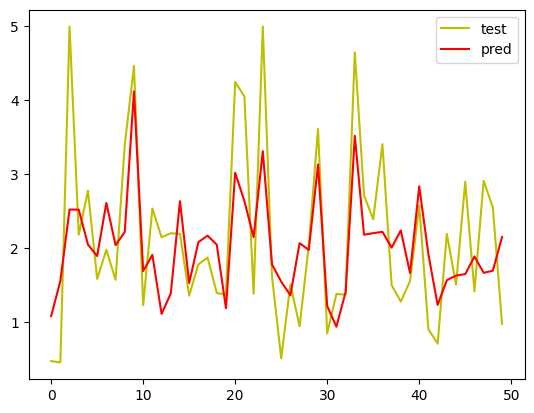

In [10]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.figure()
plt.plot(y_test[:50], c="y", label = "test")
plt.plot(y_pred[:50], c="r", label = "pred")
plt.legend()
plt.show()